In [336]:
import numpy as np
import matplotlib.pyplot as plt
import math
vmax=120/3.6
g=9.81

In [337]:
N=10000
tfinal=1
xt= np.empty(N)
yt= np.empty(N)
zt= np.empty(N)
xt[0]=0
yt[0]=2
zt[0]=0.5
vxt= np.empty(N)
vyt= np.empty(N)
vzt= np.empty(N)
vxt[0]=160/3.6
vyt[0]=20/3.6
vzt[0]=-20/3.6
dt=tfinal/N
dragcoef=(g/vmax**2)

In [338]:
def euler():
    for i in range(N-1):
        vabs = np.sqrt(vxt[i]**2 + vyt[i]**2 + vzt[i]**2)
        ax=-dragcoef*vabs*vxt[i]
        ay=-dragcoef*vabs*vyt[i]
        az=-g -dragcoef*vabs*vzt[i]

        vxt[i+1]=vxt[i]+ax*dt
        vyt[i+1]=vyt[i]+ay*dt
        vzt[i+1]=vzt[i]+az*dt
        
        xt[i+1]=xt[i]+vxt[i]*dt
        yt[i+1]=yt[i]+vyt[i]*dt
        zt[i+1]=zt[i]+vzt[i]*dt

        if zt[i + 1] < 0:
            xt[i + 1:] = xt[i + 1]
            yt[i + 1:] = yt[i + 1]
            zt[i + 1:] = 0
            break


        

        

    return
euler()

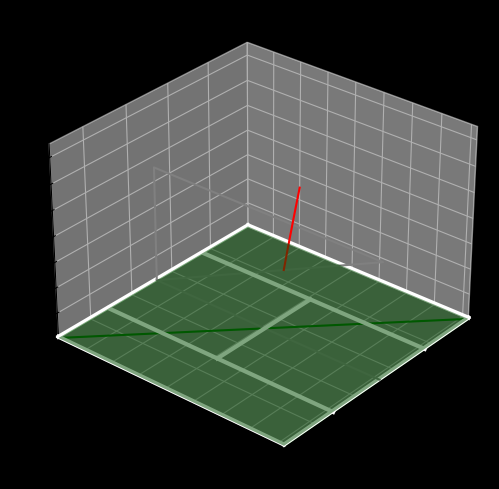

In [339]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111, projection='3d')


X, Y= np.meshgrid([0, 23.8], [0, 8.2])
Z = np.zeros_like(X)
ax.plot_surface(X, Y, Z, color='darkgreen', alpha=0.5)
ax.plot(X, Y, Z, color='darkgreen')




ax.plot([0,0], [0, 8.2], [0.01, 0.01], color='white', linewidth=3)  #horizontais
ax.plot([23.8, 23.8], [0, 8.2], [0.01, 0.01], color='white', linewidth=3) 

ax.plot([0, 23.8] ,[0, 0] , [0.01, 0.01], color='white', linewidth=3)  # verticais
ax.plot([0, 23.8],[8.2, 8.2] , [0.01, 0.01], color='white', linewidth=3)


x_rede = [23.8/2,23.8/2,23.8/2,23.8/2,23.8/2]
y_rede= [8.2, 0, 0, 8.2, 0]
z_rede = [0, 0, 0.91, 0.91, 0]

ax.plot3D(x_rede, y_rede, z_rede, color="gray")


ax.plot([23.8/2 - 5.92, 23.8/2 - 5.92],[0, 8.2] , [0, 0], color='white', linewidth=3) #linhas do meio
ax.plot([23.8/2 + 5.92, 23.8/2 + 5.92], [0, 8.2], [0, 0], color='white', linewidth=3)


ax.plot([23.8/2 - 5.92, 23.8/2 + 5.92], 
        [8.2 / 2, 8.2 / 2], [0, 0], color='white', linewidth=3) #centro

ax.view_init(elev=30, azim=40)
ax.plot3D(xt[zt >= 0], yt[zt >= 0], zt[zt >= 0], "r", label="Ball Trajectory")

ax.set_xlim(0, 23.8)
ax.set_ylim(0, 8.2)
ax.set_zlim(0, 1.5)

ax.set_facecolor('black')
fig.patch.set_facecolor('black')
